# Práctico 3 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

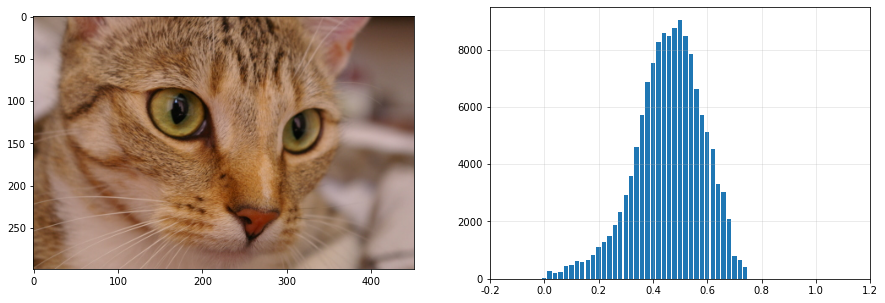

In [3]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb, 50, axes[1], False)

# 1. Normalizar histograma al rango [0,1]

Definir una función que normalice el histograma de valores de la imagen al rango [0,1]. Si la imagen es RGB, debe normalizar el histograma de luminancias.

In [4]:
def hist_normalizacion(img):

    c= img.max()
    d= img.min()
    
    out = img.copy()
    print(out.max())
    print(out.min())
    #out = (b-a) / (d - c) * (out - c) + a
    out= (out-img.min())/ (img.max()-img.min())
    #out[out < a] = a
    #out[out > b] = b
    print(out.max())
    print(out.min())
    return out

#Con este método de normalización, las siguientes afirmaciones siempre serán verdaderas:
# - El valor normalizado para el valor mínimo en el conjunto de datos siempre será 0.
# - El valor normalizado para el valor máximo en el conjunto de datos siempre será 1.
# - Los valores normalizados para todos los demás valores del conjunto de datos estarán entre 0 y 1.



0.7613882352941176
0.014792156862745097
1.0
0.0
0.7613882352941176
0.014792156862745097
1.0
0.0


Text(0.5, 1.0, 'Sin Normalizar')

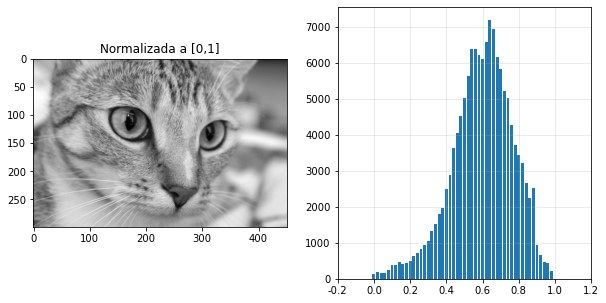

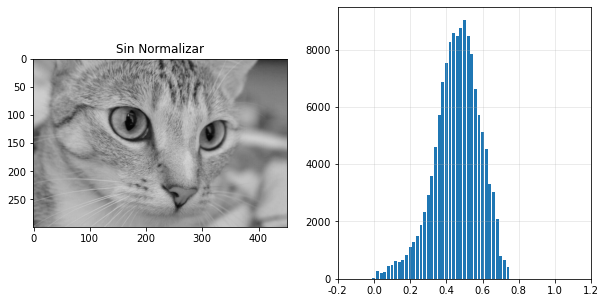

In [7]:

img_yiq = rgb2yiq(img_rgb)
img_gray= img_yiq [:,:,0]
img_gray2 = hist_normalizacion(img_gray)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_gray2, 'gray',vmin=0, vmax=1)
axes[0].set_title('Normalizada a [0,1]')
plot_hist(hist_normalizacion(img_gray), 50, axes[1])

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb[:,:,0], 'gray',vmin=0, vmax=1)
plot_hist(img_gray, 50, axes[1])
axes[0].set_title('Sin Normalizar')



## 1.1 Normalizar histograma usando percentiles

Definir una función que normalice el histograma de valores de la imagen de modo que el pixel del percentil P valga 0 y el pixel del percentil 100-P valga 1. Los valores entre los percentiles 0 y P valdrán 0 y los valores entre los percentiles 100-P y 100 valdrán 1. Si la imagen es RGB, normalizar el histograma de luminancias.

NOTA: para calcular percentiles usar np.percentile()

In [16]:
def hist_nporcentil(img, P):
    
    min_p= np.percentile(img,P) # percentil P
    print (min_p)
    max_p= np.percentile(img,100-P) # percentil 100-P
    print(max_p)
    
    out = img.copy()
    out= (out-min_p)/(max_p-min_p)
    out=np.clip(out, 0, 1) 
 
    return out

0.15602352941176467
0.6869215686274509


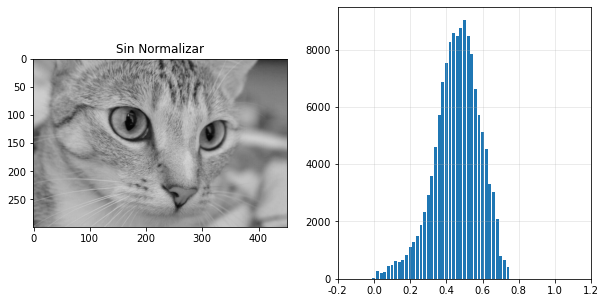

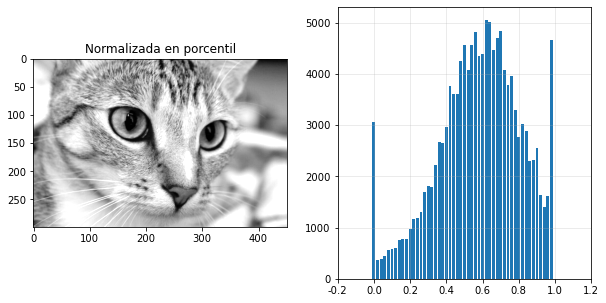

In [17]:
img_yiq = rgb2yiq(img_rgb)
img_y = img_yiq [:,:,0]

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb[:,:,0], 'gray',vmin=0, vmax=1)
plot_hist(img_y, 50, axes[1])
axes[0].set_title('Sin Normalizar')

o = hist_nporcentil(img_y, 2)
o_porcentil = img_yiq
o_porcentil[:,:,0] = o
img_rgb1=yiq2rgb(o_porcentil)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb1[:,:,0], 'gray',vmin=0, vmax=1)
axes[0].set_title('Normalizada en porcentil')
plot_hist(o, 50, axes[1])



## 2. Corrección gamma

1. Definir una función que aplique la corrección gamma a una imagen. Si la imagen es RGB, debe aplicar la corrección sobre la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] (con min y max o con percentiles) y luego aplicar corrección gamma.


Como sugerencia, pasarle como parámetro un valor $\alpha$ de manera que $\gamma$ se calcule como:

$\gamma = 2^(- \alpha$)



De esta manera, cuando $\alpha=1 \rightarrow \gamma=1/2$, y cuando $\alpha=-1 \rightarrow \gamma=2$. Entonces, para $\alpha>0$ la luminosidad aumenta y para $\alpha<0$ disminuye.

In [50]:
def hist_corre_gamma(img, a):
   # print(img) 
    gamma = 2**(-a)
    out = img ** gamma
    
    return out  

0.7613882352941176
0.014792156862745097
1.0
0.0


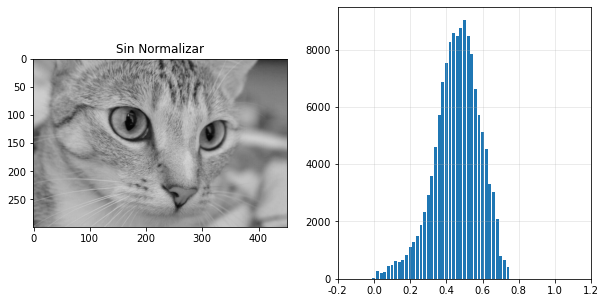

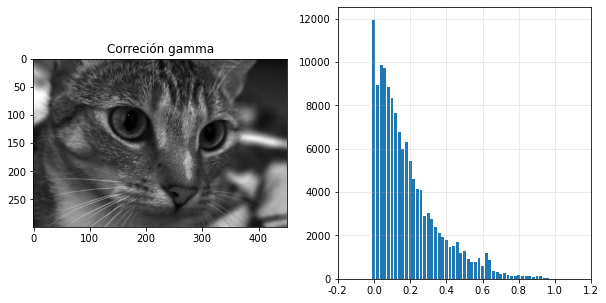

In [56]:
img_yiq = rgb2yiq(img_rgb)
img_y1 = img_yiq [:,:,0]
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb[:,:,0], 'gray',vmin=0, vmax=1)
plot_hist(img_y1, 50, axes[1])
axes[0].set_title('Sin Normalizar')


o = hist_corre_gamma(hist_normalizacion(img_y1), -2)
o_gamma = img_yiq
o_gamma[:,:,0] = o
img_rgb2=yiq2rgb(o_gamma)
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb2[:,:,0], 'gray',vmin=0, vmax=1)
axes[0].set_title('Correción gamma')
plot_hist(o, 50, axes[1])





# 3. Modificación del histograma por una función definida a tramos

1. Definir una función que tome una imagen y dos arreglos $x$ e $y$ que definan una función no-lineal en el rango $0\leq x,y\leq 1$ y aplique la función a la intensidad de los pixeles de la imagen. Si la imagen es RGB debe aplicar la función a la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] y luego aplicar corrección gamma.

Ayuda: La función np.interp() puede facilitarle la tarea

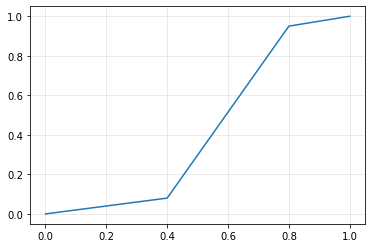

In [36]:
x = np.array([0, 0.4,  0.8,  1])
y = np.array([0, 0.08, 0.95, 1])

plt.plot(x, y)
plt.grid(alpha=0.3)

In [44]:
def hist_interpol(img, x, y): 
    img = np.interp(img, x, y)             
    return img

0.7613882352941176
0.014792156862745097
1.0
0.0


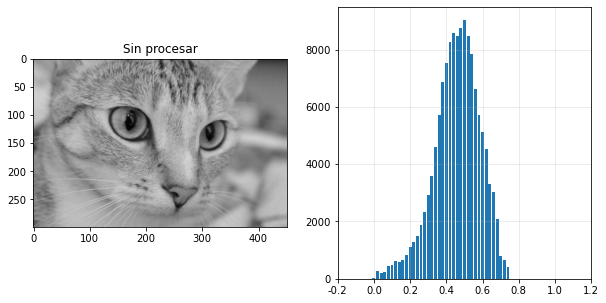

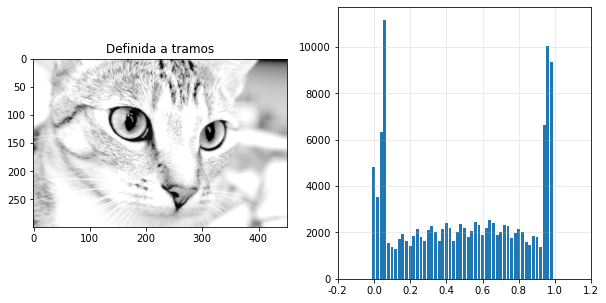

In [45]:
img_yiq = rgb2yiq(img_rgb)
img_y2 = img_yiq [:,:,0]
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb[:,:,0], 'gray',vmin=0, vmax=1)
plot_hist(img_y2, 50, axes[1])
axes[0].set_title('Sin procesar')

out = hist_interpol(hist_normalizacion(img_y2), x, y)
o_inter = img_yiq
o_inter[:,:,0] = out
img_rgb3=yiq2rgb(o_gamma)


fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb3[:,:,0], 'gray',vmin=0, vmax=1)
axes[0].set_title('Definida a tramos')
plot_hist(o, 50, axes[1])




# 4. Uniformalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución uniforme. 
2. Normalizar el histograma al rango [0,1] y uniformalizar su distribución

In [57]:
def dist_uniforme(img):

    #Genera el historama de la imagen
    hist,bins = np.histogram(img,[0,1])
 
    #Genera la función de distribución acumulada 
    cdf = hist.cumsum()
    cdf_n = cdf * hist.max()/ cdf.max()
 
    print(cdf.min())
    cdfm = np.ma.masked_equal(cdf,0) # ignora lo ceros
    cdf = (cdfm - cdfm.min())/(cdfm.max()- cdfm.min()) # función de ecualización
    cdf = np.ma.filled(cdfm,fill_value=0)
    
    return cdf



0.7613882352941176
0.014792156862745097
1.0
0.0
[[4390. 4350. 4360. ... 3450. 3430. 3440.]
 [2460. 4370. 4380. ... 3450. 3430. 3440.]
 [2460. 4480. 4340. ...  890.  880. 3430.]
 ...
 [   0. 3930. 3940. ... 3420. 3430. 3440.]
 [3930. 3940. 3950. ... 3410. 3430. 3420.]
 [3930. 3940. 3910. ... 3440. 3420. 3430.]]


Text(0.5, 1.0, 'Sin Normalizar')

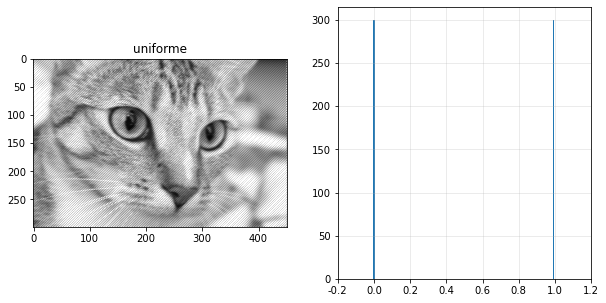

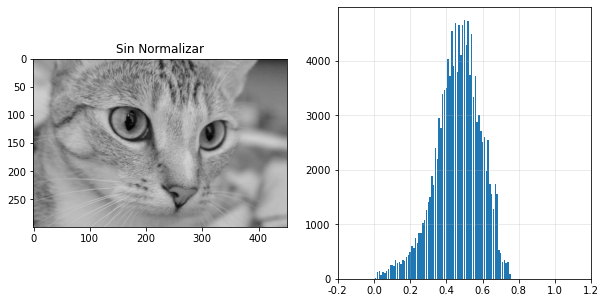

In [76]:

u = dist_uniforme(hist_normalizacion(img_y))

img_n = yiq2rgb(img_y)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_n, 'gray',vmin=0, vmax=1)
axes[0].set_title('uniforme')
plot_hist(u, 100, axes[1])

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb[:,:,0], 'gray',vmin=0, vmax=1)
plot_hist(img_y, 100, axes[1])
axes[0].set_title('Sin Normalizar')



# 5. Normalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución normal. 
2. Normalizar el histograma al rango [0,1] y normalizar su distribución.

In [14]:
from scipy.stats import norm

norm.cdf(0.5)

0.6914624612740131

In [ ]:
def dist_normal():
    
    
    
    

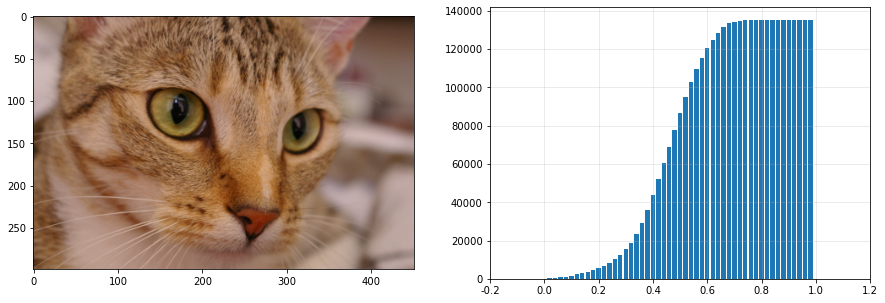

In [20]:
_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb, 50, axes[1], True)